# Analysis on Python. The next cell contains some interesting questions I would be solving

What is the average player market value by country playing in?
What is the most common player position in the dataset?
Which club has paid the most fees for player transfers?
What is the average age of players being transferred?
Which league has the highest number of players being transferred?
What is the average fee paid for players by country moving to?
What is the correlation between player age and fees paid?
What is the most common country that players are moving to?
What is the most common league that players are moving to?

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import numpy as np
pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', None)  # Show all rows


In [152]:
data = pd.read_csv('../data/clean/clean_data.csv')
data

,name,position,age,market_value,country_playing,current_league,club,country_moving_to,new_league,club_moving_to,fees_paid_for_player,on_loan
0,Erling Haaland,Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60,No
1,Antony,Forward,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95,No
2,Wesley Fofana,Defence,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80,No
3,Aurélien Tchouameni,Midfield,22,60,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80,No
4,Darwin Núñez,Forward,23,55,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,75,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,Luke Freeman,Midfield,30,1,England,Championship,Sheffield United,England,Championship,Luton Town,0,No
1993,Antoine Leautey,Forward,26,1,Portugal,Liga Portugal,Gil Vicente FC,France,Ligue 2,Amiens SC,0,No
1994,Kal Naismith,Defence,30,1,England,Championship,Luton Town,England,Championship,Bristol City,0,No
1995,Alireza Beiranvand,Goalkeeper,29,1,Belgium,Jupiler Pro League,Royal Antwerp FC,Iran,Other,Persepolis FC,0,No


In [153]:
p_counts = data['position'].value_counts()

# print the country counts
print(p_counts)

position
Forward       717
Midfield      599
Defence       580
Goalkeeper    101
Name: count, dtype: int64


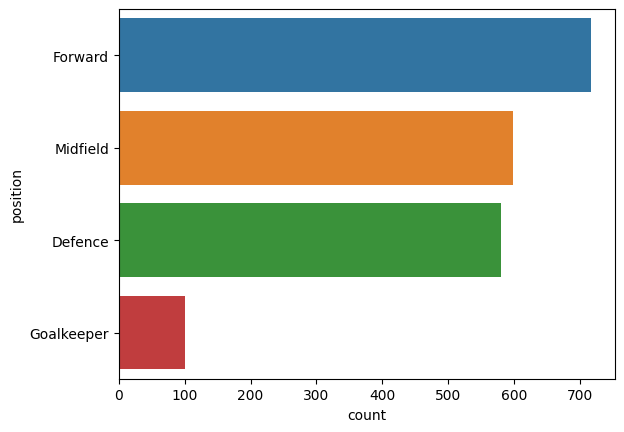

In [154]:
sns.countplot(y=data['position'], order= data['position'].value_counts().index);

In [155]:
avg_market_value_by_country = data.groupby('country_playing')['market_value'].mean()
avg_market_value_by_country = avg_market_value_by_country.sort_values(ascending=False)
avg_market_value_by_country.to_frame().head(30)




,market_value
country_playing,
Monaco,10.000000
England,8.460432
Georgia,8.000000
Netherlands,7.301887
Austria,7.210526
Italy,6.554348
Germany,6.457627
Portugal,6.127660
Spain,6.118280


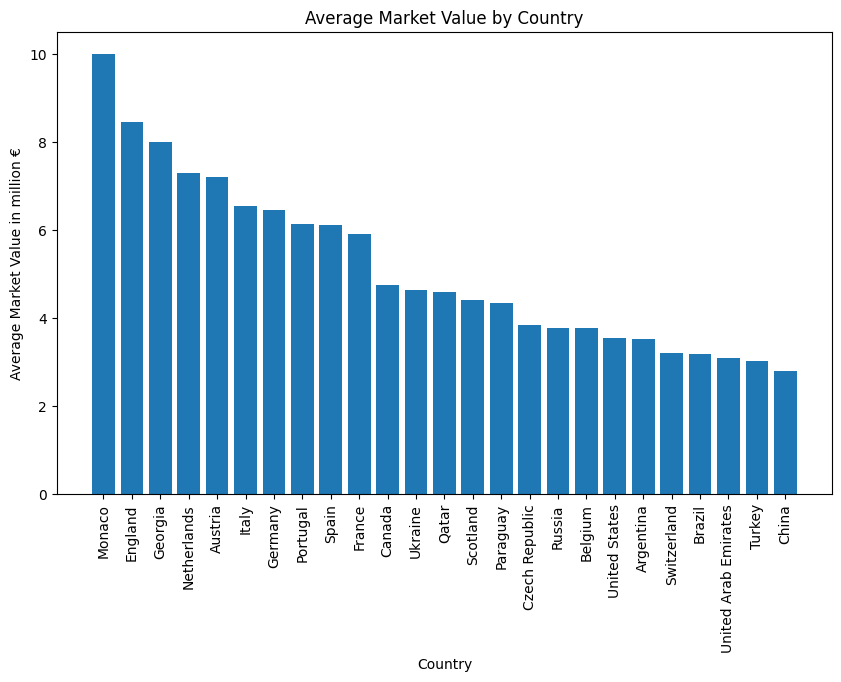

In [156]:
plt.figure(figsize=(10, 6))
plt.bar(avg_market_value_by_country_plot.index, avg_market_value_by_country_plot.values)
plt.title('Average Market Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Market Value in million €')
plt.xticks(rotation=90)
plt.show()

In [157]:
data

,name,position,age,market_value,country_playing,current_league,club,country_moving_to,new_league,club_moving_to,fees_paid_for_player,on_loan
0,Erling Haaland,Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60,No
1,Antony,Forward,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95,No
2,Wesley Fofana,Defence,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80,No
3,Aurélien Tchouameni,Midfield,22,60,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80,No
4,Darwin Núñez,Forward,23,55,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,75,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,Luke Freeman,Midfield,30,1,England,Championship,Sheffield United,England,Championship,Luton Town,0,No
1993,Antoine Leautey,Forward,26,1,Portugal,Liga Portugal,Gil Vicente FC,France,Ligue 2,Amiens SC,0,No
1994,Kal Naismith,Defence,30,1,England,Championship,Luton Town,England,Championship,Bristol City,0,No
1995,Alireza Beiranvand,Goalkeeper,29,1,Belgium,Jupiler Pro League,Royal Antwerp FC,Iran,Other,Persepolis FC,0,No


C:\Users\Admin\AppData\Local\Temp\ipykernel_13148\4161502477.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country_playing', y='market_value', data=data, estimator=np.mean, ci=None, order=avgplot.index)


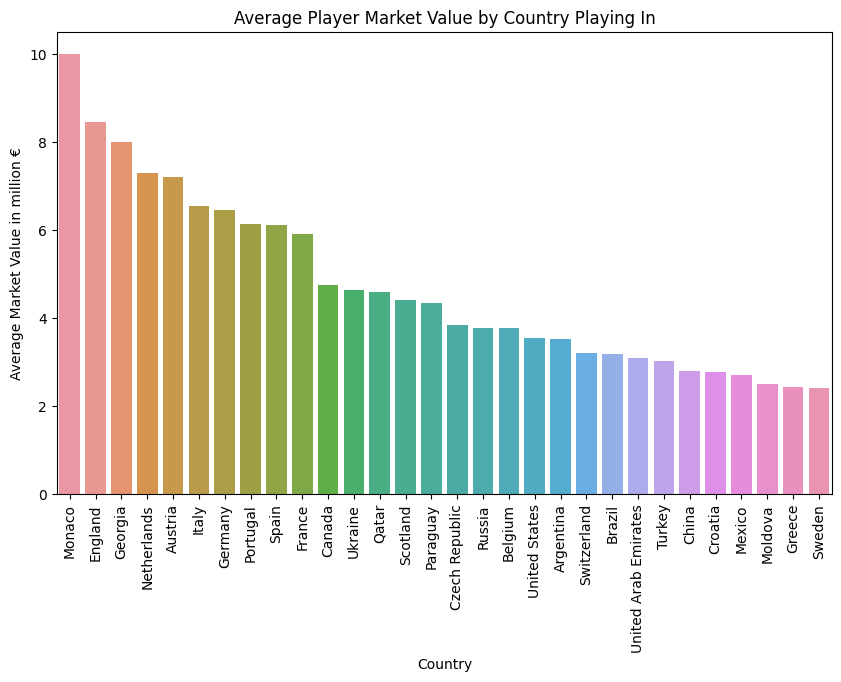

In [158]:
avg_market_value = data.groupby('country_playing')['market_value'].mean()
avgplot = avg_market_value.sort_values(ascending=False).to_frame().head(30)

plt.figure(figsize=(10,6))
sns.barplot(x='country_playing', y='market_value', data=data, estimator=np.mean, ci=None, order=avgplot.index)
plt.xlabel('Country')
plt.ylabel('Average Market Value in million €')
plt.title('Average Player Market Value by Country Playing In')
plt.xticks(rotation=90)
plt.show()


In [159]:
club_fees = data.groupby('club_moving_to')['fees_paid_for_player'].sum()
max_fees_club = club_fees.idxmax()
print("The club that has paid the most fees for player transfers is:", max_fees_club)


The club that has paid the most fees for player transfers is: Chelsea FC


In [160]:
club_fees.sort_values(ascending=False)

club_moving_to
Chelsea FC                281
Manchester United         240
West Ham United           182
Tottenham Hotspur         170
Nottingham Forest         162
                         ... 
Club Cerro Porteño          0
Club Atlético Talleres      0
Club Atlético Lanús         0
OFI Crete FC                0
Ümraniyespor                0
Name: fees_paid_for_player, Length: 549, dtype: int64

In [161]:
top = club_fees.sort_values(ascending=False).head(20)
top

club_moving_to
Chelsea FC                 281
Manchester United          240
West Ham United            182
Tottenham Hotspur          170
Nottingham Forest          162
FC Barcelona               153
Paris Saint-Germain        148
Manchester City            140
Bayern Munich              138
Newcastle United           137
Wolverhampton Wanderers    137
Arsenal FC                 132
Leeds United               111
Ajax Amsterdam             105
Juventus FC                103
Atalanta BC                 98
Borussia Dortmund           91
Liverpool FC                91
Everton FC                  85
Real Madrid                 80
Name: fees_paid_for_player, dtype: int64

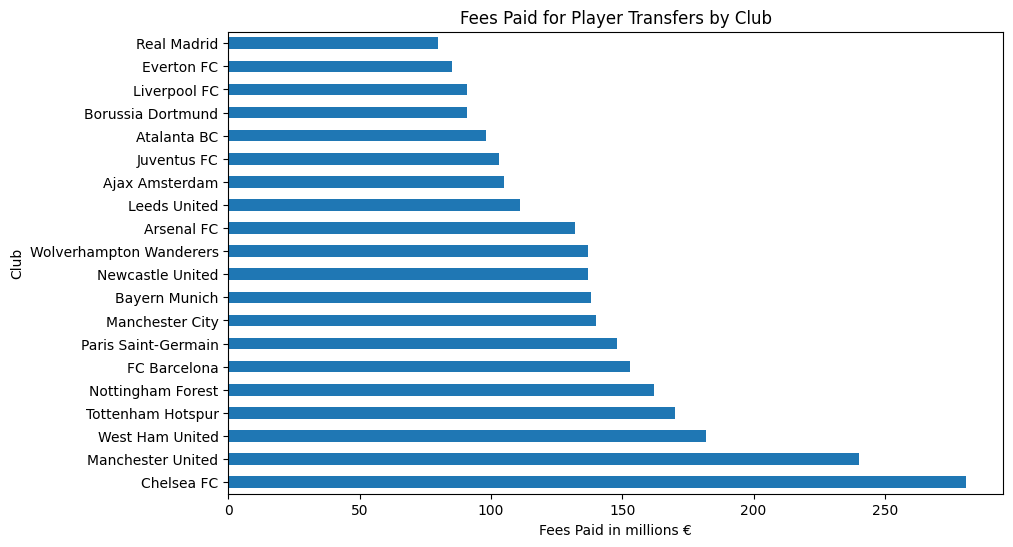

In [162]:
plt.figure(figsize=(10, 6))
top.plot(kind='barh')
plt.title('Fees Paid for Player Transfers by Club')
plt.xlabel('Fees Paid in millions €')
plt.ylabel('Club')
plt.show()

In [163]:
avg_age = data['age'].mean()

print(f"The average age of players being transferred is {avg_age:.0f} years old.")

The average age of players being transferred is 25 years old.


In [164]:
data.columns

Index(['name', 'position', 'age', 'market_value', 'country_playing',
       'current_league', 'club', 'country_moving_to', 'new_league',
       'club_moving_to', 'fees_paid_for_player', 'on_loan'],
      dtype='object')

In [165]:
transfers_by_league = data['new_league'].value_counts()

# Get the league with the highest number of transfers
league_with_most_transfers = transfers_by_league.index[0]

print(f"The league with the most transfers is {league_with_most_transfers}.")

The league with the most transfers is Serie A.


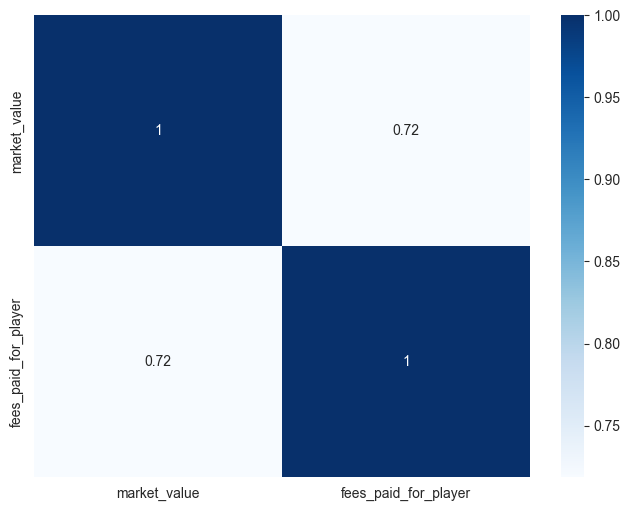

In [176]:
corr = data[['market_value', 'fees_paid_for_player']].corr()
sns.set_palette('pastel')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.savefig("correlation.png", dpi=300)
plt.show()

In [89]:
league_counts = data.groupby('club_moving_to')['new_league'].value_counts()
league_counts.sort_values(ascending=False).head(20).to_frame()

,,count
club_moving_to,new_league,
US Salernitana 1919,Serie A,21
Nottingham Forest,Premier League,19
US Cremonese,Serie A,19
AC Monza,Serie A,18
FC Empoli,Serie A,15
Olympique Marseille,Ligue 1,15
Burnley FC,Championship,14
Hellas Verona,Serie A,14
US Lecce,Serie A,14


In [91]:
average_fees = data.groupby('club_moving_to')['fees_paid_for_player'].mean()
avgplot = average_fees.sort_values(ascending=False).head(20).to_frame()

In [92]:
avgplot

,fees_paid_for_player
club_moving_to,
Manchester United,40.000000
Real Madrid,40.000000
Chelsea FC,35.125000
Newcastle United,34.250000
Manchester City,28.000000
Bayern Munich,27.600000
Arsenal FC,26.400000
Wolverhampton Wanderers,22.833333
West Ham United,22.750000


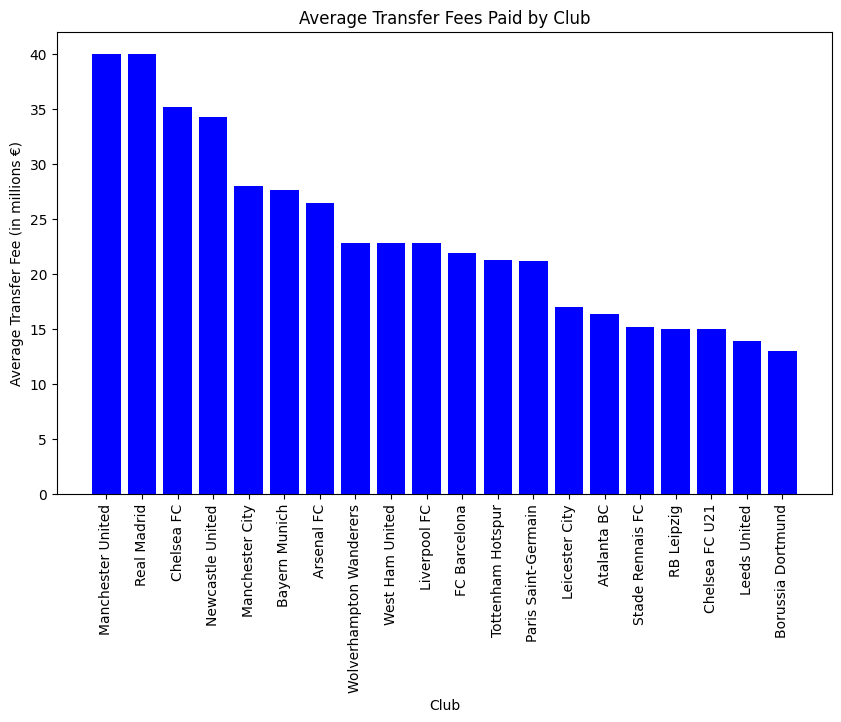

In [96]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(avgplot.index, avgplot['fees_paid_for_player'], color='blue')
ax.set_title('Average Transfer Fees Paid by Club')
ax.set_xlabel('Club')
ax.set_ylabel('Average Transfer Fee (in millions €)')
plt.xticks(rotation=90)
plt.show()

In [98]:
corr = data[['age', 'fees_paid_for_player']].corr()

print(corr)


                           age  fees_paid_for_player
age                   1.000000             -0.129735
fees_paid_for_player -0.129735              1.000000


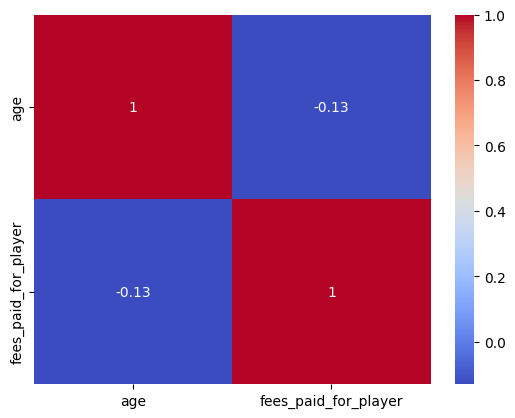

In [99]:
corr = data[['age', 'fees_paid_for_player']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

# This means that there is no correlation with the player's age and fees paid, it could also mean that there are so many players that were transferred for free or very low amount.

In [100]:
most_common_country = data['country_moving_to'].value_counts().index[0]
print(most_common_country)


Italy


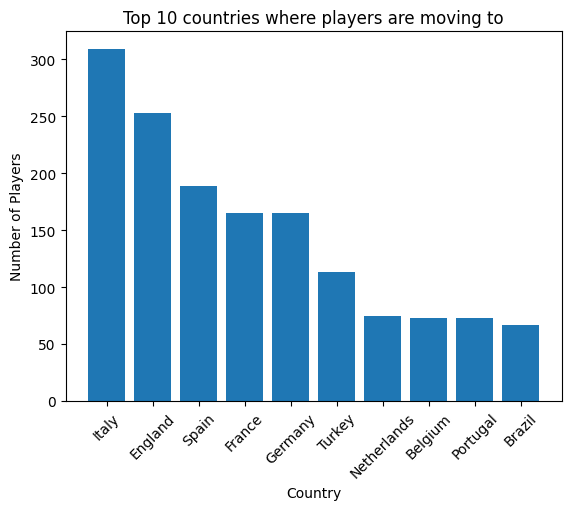

In [104]:
country_counts = data.groupby('country_moving_to')['name'].count()

# Sort the values in descending order and get the top 10 countries
top_countries = country_counts.sort_values(ascending=False).head(10)

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(top_countries.index, top_countries.values)

# Set chart title and axis labels
ax.set_title('Top 10 countries where players are moving to')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Players')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

In [64]:
data.columns

Index(['name', 'position', 'age', 'market_value', 'country_playing',
       'current_league', 'club', 'country_moving_to', 'new_league',
       'club_moving_to', 'fees_paid_for_player', 'on_loan'],
      dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  1997 non-null   object
 1   position              1997 non-null   object
 2   age                   1997 non-null   int64 
 3   market_value          1997 non-null   int64 
 4   country_playing       1997 non-null   object
 5   current_league        1997 non-null   object
 6   club                  1997 non-null   object
 7   country_moving_to     1997 non-null   object
 8   new_league            1997 non-null   object
 9   club_moving_to        1997 non-null   object
 10  fees_paid_for_player  1997 non-null   int64 
 11  on_loan               1997 non-null   object
dtypes: int64(3), object(9)
memory usage: 187.3+ KB


# What is the average player market value by country playing in?

# the correlation between player age and fees paid

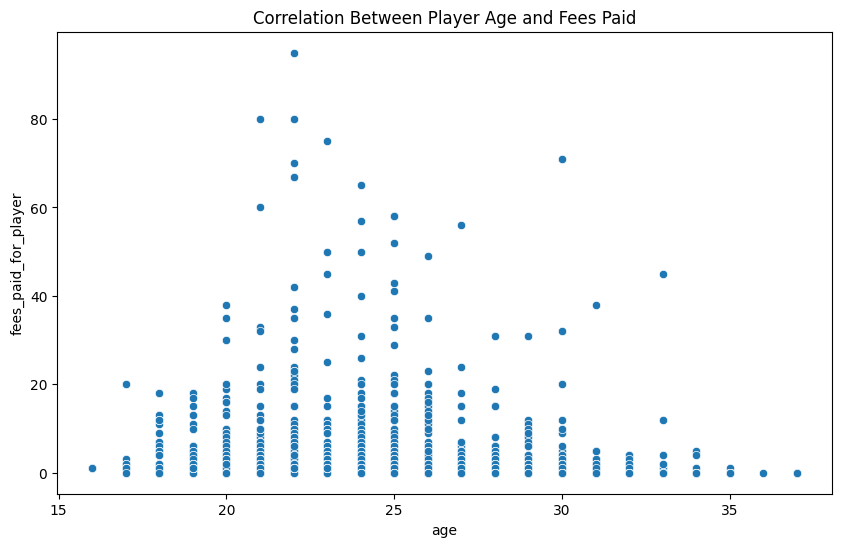

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='fees_paid_for_player', data=data)
plt.title('Correlation Between Player Age and Fees Paid')
plt.show()

In [75]:
league_to = data.groupby(['new_league', 'country_moving_to'], as_index=False) \
                    .agg({'fees_paid_for_player': sum}).round(2) \
                    .rename(columns={'fees_paid_for_player': 'Spend', 'new_league': 'League', 'country_moving_to': 'Country'})

In [76]:
league_to

,League,Country,Spend
0,1.Lig,Turkey,0
1,2. Bundesliga,Germany,22
2,Bundesliga,Austria,36
3,Bundesliga,Germany,491
4,Championship,England,86
...,...,...,...
74,other,Sweden,3
75,other,Switzerland,0
76,other,Tunisia,0
77,other,United States,4


In [77]:
league_from = data.groupby(['current_league', 'country_playing'], as_index=False) \
                    .agg({'fees_paid_for_player': sum}).round(2) \
                    .rename(columns={'fees_paid_for_player': 'Income', 'current_league': 'League', 'country_playing': 'Country'})



In [78]:
league_from

,League,Country,Income
0,1.Division,Denmark,2
1,1.Division,Russia,17
2,1.Lig,Turkey,4
3,2. Bundesliga,Germany,31
4,3. Liga,Germany,5
...,...,...,...
94,Without League,England,1
95,Without League,Nigeria,0
96,Without League,Portugal,7
97,Without League,Saudi Arabia,5


In [79]:
df_league_all = league_to.merge(league_from, on=['Country', 'League'])
df_league_all['Net spend'] = round(df_league_all.Income - df_league_all.Spend, 2)
df_league_top5 = df_league_all.nlargest(5, 'Spend').copy()

In [80]:
df_league_top5

,League,Country,Spend,Income,Net spend
23,Premier League,England,2246,894,-1352
29,Serie A,Italy,760,752,-8
17,Ligue 1,France,521,488,-33
11,LaLiga,Spain,514,453,-61
3,Bundesliga,Germany,491,536,45


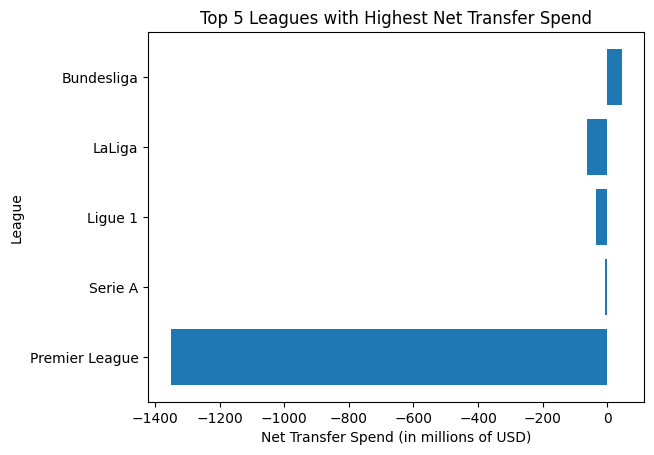

In [85]:
# create a horizontal bar chart
plt.barh(df_league_top5['League'], df_league_top5['Net spend'])

# set chart title and axis labels
plt.title('Top 5 Leagues with Highest Net Transfer Spend')
plt.xlabel('Net Transfer Spend (in millions of USD)')
plt.ylabel('League')

# display the chart
plt.show()

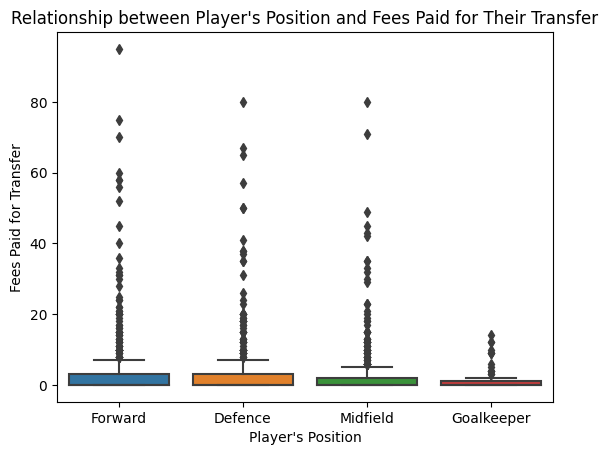

In [107]:
# Relationship between player's position and fees paid for their transfer
import seaborn as sns

sns.boxplot(data=data, x='position', y='fees_paid_for_player')
plt.title('Relationship between Player\'s Position and Fees Paid for Their Transfer')
plt.xlabel('Player\'s Position')
plt.ylabel('Fees Paid for Transfer')
plt.savefig("test.png", dpi=300)
plt.show()


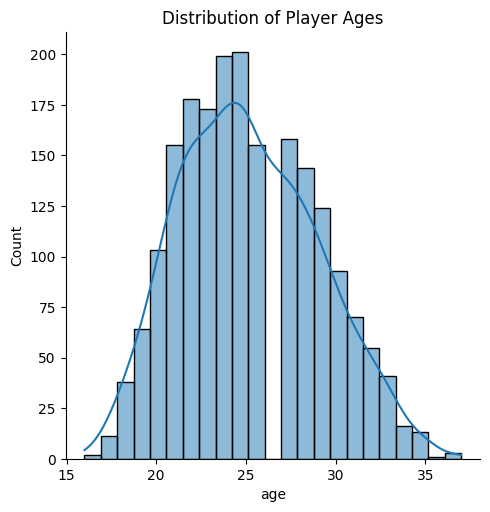

In [82]:
# Distribution of player ages
sns.displot(data, x="age", kde=True)
plt.title('Distribution of Player Ages')
plt.show()


In [69]:
data

,name,position,age,market_value,country_playing,current_league,club,country_moving_to,new_league,club_moving_to,fees_paid_for_player,on_loan
0,Erling Haaland,Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60,No
1,Antony,Forward,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95,No
2,Wesley Fofana,Defence,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80,No
3,Aurélien Tchouameni,Midfield,22,60,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80,No
4,Darwin Núñez,Forward,23,55,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,75,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,Luke Freeman,Midfield,30,1,England,Championship,Sheffield United,England,Championship,Luton Town,0,No
1993,Antoine Leautey,Forward,26,1,Portugal,Liga Portugal,Gil Vicente FC,France,Ligue 2,Amiens SC,0,No
1994,Kal Naismith,Defence,30,1,England,Championship,Luton Town,England,Championship,Bristol City,0,No
1995,Alireza Beiranvand,Goalkeeper,29,1,Belgium,Jupiler Pro League,Royal Antwerp FC,Iran,other,Persepolis FC,0,No


In [116]:
most_expensive_player = data.sort_values(by='fees_paid_for_player', ascending=False).iloc[0]
print("The most expensive player is", most_expensive_player['name'], "from", most_expensive_player['club_moving_to'], "bought for", most_expensive_player['fees_paid_for_player'], "million euros.")


The most expensive player is Antony from Manchester United bought for 95 million euros.


In [122]:
top_10_expensive_players = data.sort_values(by='fees_paid_for_player', ascending=False).head(10)
top_boys = top_10_expensive_players[['name', 'club_moving_to', 'fees_paid_for_player']]
top_boys

,name,club_moving_to,fees_paid_for_player
1,Antony,Manchester United,95
2,Wesley Fofana,Chelsea FC,80
3,Aurélien Tchouameni,Real Madrid,80
4,Darwin Núñez,Liverpool FC,75
5,Casemiro,Manchester United,71
6,Alexander Isak,Newcastle United,70
7,Matthijs de Ligt,Bayern Munich,67
11,Marc Cucurella,Chelsea FC,65
0,Erling Haaland,Manchester City,60
15,Raphinha,FC Barcelona,58


In [121]:
top_10_expensive_players

,name,position,age,market_value,country_playing,current_league,club,country_moving_to,new_league,club_moving_to,fees_paid_for_player,on_loan
1,Antony,Forward,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95,No
2,Wesley Fofana,Defence,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80,No
3,Aurélien Tchouameni,Midfield,22,60,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80,No
4,Darwin Núñez,Forward,23,55,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,75,No
5,Casemiro,Midfield,30,40,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,71,No
6,Alexander Isak,Forward,22,30,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,70,No
7,Matthijs de Ligt,Defence,22,70,Italy,Serie A,Juventus FC,Germany,Bundesliga,Bayern Munich,67,No
11,Marc Cucurella,Defence,24,28,England,Premier League,Brighton & Hove Albion,England,Premier League,Chelsea FC,65,No
0,Erling Haaland,Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60,No
15,Raphinha,Forward,25,45,England,Premier League,Leeds United,Spain,LaLiga,FC Barcelona,58,No


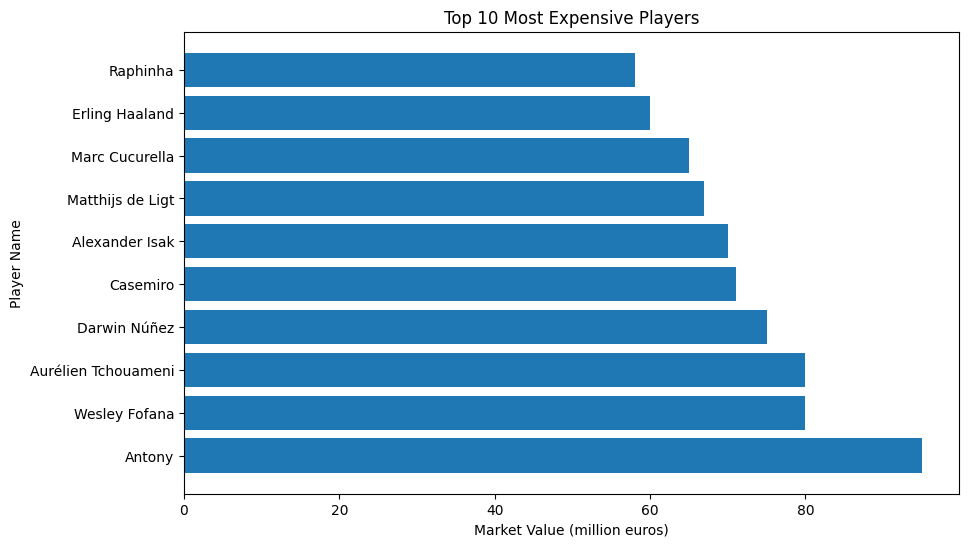

In [123]:
import matplotlib.pyplot as plt

# Assuming that 'top_10_expensive_players' is your pandas DataFrame containing the required data.

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_expensive_players['name'], top_10_expensive_players['fees_paid_for_player'])
plt.title('Top 10 Most Expensive Players')
plt.xlabel('Market Value (million euros)')
plt.ylabel('Player Name')
plt.show()


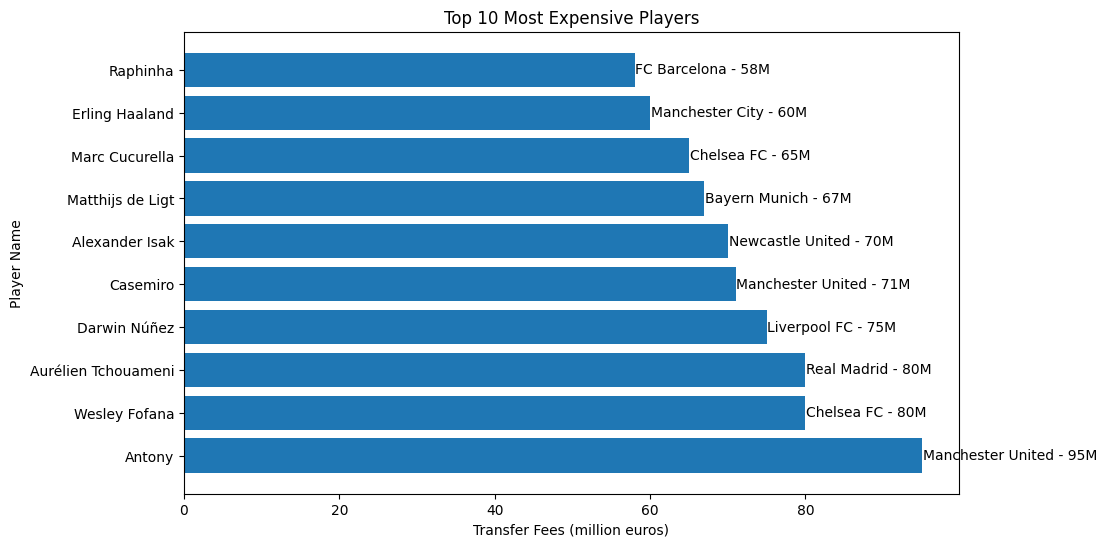

In [130]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_expensive_players['name'], top_10_expensive_players['fees_paid_for_player'])
plt.title('Top 10 Most Expensive Players')
plt.xlabel('Transfer Fees (million euros)')
plt.ylabel('Player Name')

# Add labels to the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.1, i, top_10_expensive_players.iloc[i]['club_moving_to'] + ' - ' + str(top_10_expensive_players.iloc[i]['fees_paid_for_player']) + 'M', ha='left', va='center')

plt.show()


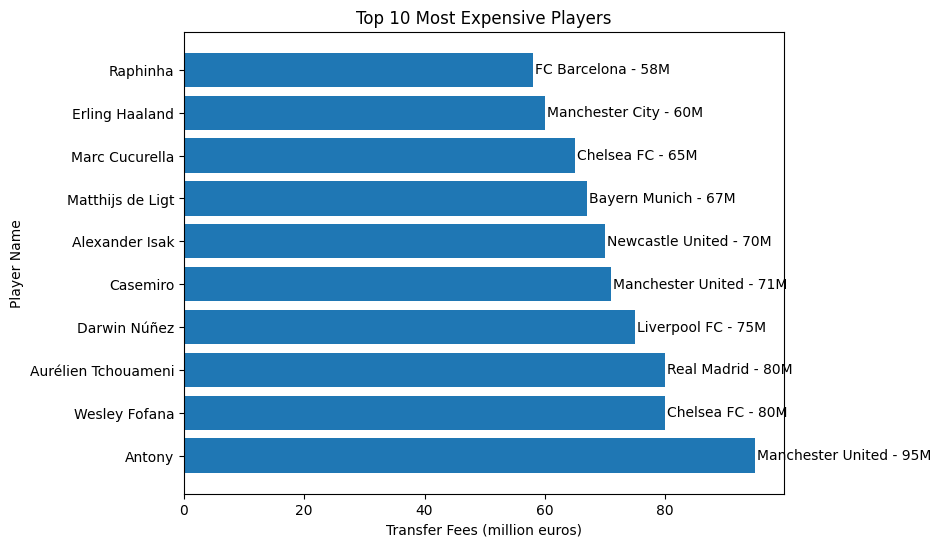

In [139]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_10_expensive_players['name'], top_10_expensive_players['fees_paid_for_player'])
ax.set_title('Top 10 Most Expensive Players')
ax.set_xlabel('Transfer Fees (million euros)')
ax.set_ylabel('Player Name')

# Add labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 0.3, i, top_10_expensive_players.iloc[i]['club_moving_to'] + ' - ' + str(top_10_expensive_players.iloc[i]['fees_paid_for_player']) + 'M', ha='left', va='center')

# Adjust the plot size
plt.subplots_adjust(left=0.3)

plt.show()
